### Drill

First let me state that these two models are fantastically awful. There doesn't seem to be much of a relationship. It's all very poor. However the increased variance in the weighted model is interesting.

Why don't you add the other feature and mess around with  $k$  and weighting to see if you can do any better than we've done so far?

In [248]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

In [28]:
music.describe()

,duration,loudness,bpm
count,30.000000,30.000000,30.000000
mean,222.966667,21.900000,89.333333
std,92.743057,11.645185,15.563736
min,102.000000,4.000000,60.000000
25%,168.500000,13.250000,75.750000
50%,197.500000,19.500000,90.000000
75%,261.250000,27.750000,101.500000
max,403.000000,51.000000,120.000000


### Holdout Groups

- using 'weights'

In [249]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split


# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10 , weights='distance' )
X = music[['loudness', 'duration']]
y = music.bpm

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)


### Feature Scaling

Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. For example, the majority of classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.

In [250]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  



In [251]:
# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred =  knn.predict(X_test)



In [252]:
y_pred

array([78.69664376, 95.81970432, 82.64356161, 89.44626797, 81.46214411,
       86.42317853])

In [254]:
print('With 20% Holdout: ' + str(knn.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(knn.fit(X, y).score(X, y)))

With 20% Holdout: 0.3467468678899378
Testing on Sample: 0.9928822245420897


### Cross Validation

In [255]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn, X_train , y_train , cv=10)

array([-4.11751591e+00,  1.19488552e-01, -6.72603962e-03, -1.40796954e+01,
        0.00000000e+00,  6.70677721e-01,  4.73125807e-01,  9.63128013e-02,
        4.05203734e-01,  5.78125309e-01])

In [259]:
score_w = cross_val_score(knn, X_train, y_train , cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Weighted Accuracy: 0.14 (+/- 1.01)


In [260]:
# creating odd list of K for KNN
myList = list(range(1,23))

# subsetting just the odd ones
neighbors_ = list(filter(lambda x: x % 2 != 0, myList))



In [261]:
# loading library
from sklearn.neighbors import KNeighborsRegressor

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors_:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10  
                             #, scoring='accuracy'  
                            )
    cv_scores.append(scores.mean())

In [262]:
cv_scores

[-3.422348803433219,
 -3.0252437757913073,
 -3.3356117119281885,
 -3.1241858001563476,
 -2.4486335178394727,
 -2.597364515329936,
 -2.489634232587261,
 -2.4136965547876206,
 -2.5174120473228987,
 -2.366161669796189,
 -2.2220835389398976]

The optimal number of neighbors is 21


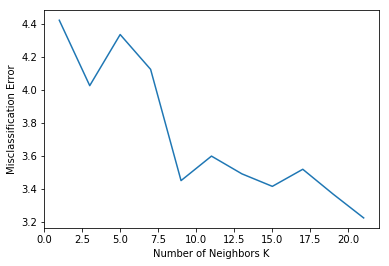

In [263]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors_[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors_, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

However, with k=21 the results are not better...!?